In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white"
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 1.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=96ba702abd07c24e872be9260aacc7fa67e3db6cc4637adaceb7b9d971d0ba7b
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 2.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS-project/retail_price.csv')

In [4]:
df

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.900000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.950000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.950000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.950000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,214.950000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,215.000000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,209.000000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,205.000000


In [5]:
df['product_id'].unique()

array(['bed1', 'garden5', 'consoles1', 'garden7', 'health9', 'cool4',
       'health3', 'perfumery1', 'cool5', 'health8', 'garden4',
       'computers5', 'garden10', 'computers6', 'health6', 'garden6',
       'health10', 'watches2', 'health1', 'garden8', 'garden9',
       'watches6', 'cool3', 'perfumery2', 'cool2', 'computers1',
       'consoles2', 'health5', 'watches8', 'furniture4', 'watches5',
       'health7', 'bed3', 'garden3', 'bed2', 'furniture3', 'watches4',
       'watches3', 'furniture2', 'garden2', 'furniture1', 'health2',
       'garden1', 'cool1', 'computers4', 'watches7', 'computers3',
       'health4', 'watches1', 'computers2', 'bed4', 'bed5'], dtype=object)

In [6]:
df.isnull().sum()

product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64

In [8]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
product_id,bed1,bed1,bed1,bed1,bed1,bed1,bed1,bed1,bed1,bed1
product_category_name,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table
month_year,01-05-2017,01-06-2017,01-07-2017,01-08-2017,01-09-2017,01-10-2017,01-11-2017,01-12-2017,01-01-2018,01-02-2018
qty,1,3,6,4,2,3,11,6,19,18
total_price,45.95,137.85,275.7,183.8,91.9,137.85,445.85,239.94,759.81,719.82
freight_price,15.1,12.933333,14.84,14.2875,15.1,15.1,15.832727,15.23,16.533684,13.749444
unit_price,45.95,45.95,45.95,45.95,45.95,45.95,40.531818,39.99,39.99,39.99
product_name_lenght,39,39,39,39,39,39,39,39,39,39
product_description_lenght,161,161,161,161,161,161,161,161,161,161
product_photos_qty,2,2,2,2,2,2,2,2,2,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [10]:
newdf = df.transpose()
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
product_id,bed1,bed1,bed1,bed1,bed1,bed1,bed1,bed1,bed1,bed1
product_category_name,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table
month_year,01-05-2017,01-06-2017,01-07-2017,01-08-2017,01-09-2017,01-10-2017,01-11-2017,01-12-2017,01-01-2018,01-02-2018
qty,1,3,6,4,2,3,11,6,19,18
total_price,45.95,137.85,275.7,183.8,91.9,137.85,445.85,239.94,759.81,719.82
freight_price,15.1,12.933333,14.84,14.2875,15.1,15.1,15.832727,15.23,16.533684,13.749444
unit_price,45.95,45.95,45.95,45.95,45.95,45.95,40.531818,39.99,39.99,39.99
product_name_lenght,39,39,39,39,39,39,39,39,39,39
product_description_lenght,161,161,161,161,161,161,161,161,161,161
product_photos_qty,2,2,2,2,2,2,2,2,2,2


In [11]:
print(f"Columns: {df.shape[1]}\nSamples: {df.shape[0]}")

Columns: 30
Samples: 676


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


In [13]:
fig = px.histogram(df,
                   x='total_price',
                   nbins=20,
                   title='Distribution of Total Price')
fig.show()

In [14]:
fig = px.box(df,
             y='unit_price',
             title='Distribution of Unit Price')
fig.show()

In [15]:
fig = px.scatter(df,
                 x='qty',
                 y='total_price', trendline='ols',
                 title='Quantity vs Total Price')
fig.show()

In [16]:
fig = px.bar(df, x='product_category_name',
             y='total_price', title='Total Price by Product Category')
fig.show()

In [17]:
fig = px.bar(df, x='product_category_name',
             y='unit_price', title='Unit Price by Product Category')
fig.show()

In [18]:
fig = px.box(df, x='weekday',
             y='total_price',
             title='Box Plot of Total Price by number of Weekdays in a Month')
fig.show()

In [19]:
df['comp1_diff'] = df['unit_price'] - df['comp_1']
df['comp2_diff'] = df['unit_price'] - df['comp_2']
df['comp3_diff'] = df['unit_price'] - df['comp_3']

for i in range(1,4):
    comp = f"comp{i}_diff"
    fig = px.bar(x=df['product_category_name'],
                 y=df[comp],
                 title=f"Competitor {i} Price Difference per Unit",
                 labels={
                     'x': 'Product Category',
                     'y': f'Competitor {i}'
                 })
    fig.show()

In [20]:
monthly_df = df.groupby(by='month_year').agg({
    'unit_price': 'mean', 'total_price': 'sum', 'freight_price': 'sum',
    'qty': 'sum', 'weekday': 'sum', 'weekend': 'sum', 'customers': 'sum'
}).reset_index()
monthly_df['month_year'] = pd.to_datetime(monthly_df['month_year'], format='%d-%m-%Y')
monthly_df = monthly_df.sort_values(by='month_year')

In [21]:
monthly_df.head()

,month_year,unit_price,total_price,freight_price,qty,weekday,weekend,customers
0,2017-01-01,207.445000,2864.19,33.961250,9,44,18,18
2,2017-02-01,127.827143,3584.11,217.847838,35,180,72,78
4,2017-03-01,122.586615,10204.38,282.314965,101,299,104,242
6,2017-04-01,119.288667,11524.62,335.440132,121,300,150,309
8,2017-05-01,104.785769,21843.33,393.828633,222,460,160,803


In [22]:
fig = px.scatter(monthly_df,
                 x='customers', y='total_price', trendline='ols',
                 title='Total Price vs Number of Customers')
fig.show()

In [24]:
fig = px.scatter(monthly_df,
             x='weekend', y='total_price', trendline='ols',
             title='Weekly Analysis of Total Price')
fig.show()

In [25]:
fig = px.bar(monthly_df,
             x='month_year', y='customers',
             title='Customers per month')
fig.show()


In [26]:
data = df.sort_values(by=['product_id', 'month_year'])

In [27]:
data

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price,comp1_diff,comp2_diff,comp3_diff
8,bed1,bed_bath_table,01-01-2018,19,759.81,16.533684,39.990000,39,161,2,...,39.99,4.0,16.533684,39.990000,4.0,16.533684,39.990000,-46.910000,0.000000,0.000000
9,bed1,bed_bath_table,01-02-2018,18,719.82,13.749444,39.990000,39,161,2,...,39.99,4.0,13.749444,39.990000,4.0,13.749444,39.990000,-46.910000,0.000000,0.000000
10,bed1,bed_bath_table,01-03-2018,17,679.83,16.462353,39.990000,39,161,2,...,39.99,4.0,16.462353,39.990000,4.0,16.462353,39.990000,-46.910000,0.000000,0.000000
11,bed1,bed_bath_table,01-04-2018,13,519.87,14.236154,39.990000,39,161,2,...,39.99,4.0,14.236154,39.990000,4.0,14.236154,39.990000,-45.055000,0.000000,0.000000
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,215.00,4.4,8.760000,45.950000,4.0,15.100000,45.900000,-43.950000,-169.050000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,watches8,watches_gifts,01-06-2018,3,457.90,19.170000,152.633333,35,640,1,...,105.00,4.2,23.823571,138.220000,3.8,16.108000,145.166667,33.633333,47.633333,14.413333
359,watches8,watches_gifts,01-07-2017,2,479.80,14.805000,239.900000,35,640,1,...,239.90,4.1,14.805000,197.383000,3.8,16.606000,239.850000,78.309091,0.000000,42.517000
367,watches8,watches_gifts,01-07-2018,14,2200.00,16.657143,157.142857,35,640,1,...,105.00,4.2,24.938750,155.000000,3.8,16.470000,152.633333,38.779221,52.142857,2.142857
368,watches8,watches_gifts,01-08-2018,11,1737.40,14.592727,157.945455,35,640,1,...,105.00,4.2,23.385714,145.550909,3.8,21.897273,157.142857,45.945455,52.945455,12.394545


In [28]:
data['product_id'].nunique()

52

In [29]:
all_products = df['product_id'].unique()
full_dates = pd.date_range(start=df['month_year'].min(), end=df['month_year'].max(), freq='M')

In [30]:
df = df.set_index(['product_id', 'month_year']).unstack(fill_value=0).stack().reset_index()

In [31]:
processed_data = pd.DataFrame()

In [32]:
def create_lag_features(group):
    group = group.sort_values(by='month_year')
    for lag in range(1, 15):
        group[f'lag_{lag}'] = group['unit_price'].shift(lag)
    return group

In [33]:
grouped = df.groupby('product_id').apply(create_lag_features)
grouped = grouped.dropna(subset=[f'lag_{lag}' for lag in range(1, 15)])

In [34]:
grouped = grouped.reset_index(drop=True)

In [35]:
grouped

,product_id,month_year,product_category_name,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12,lag_13,lag_14
0,bed1,01-08-2017,bed_bath_table,4,183.80,14.287500,45.950000,39,161,2,...,39.990000,45.950000,39.990000,0.000000,39.990000,0.000000,39.990000,0.000000,39.990000,0.000000
1,bed1,01-08-2018,bed_bath_table,8,313.92,16.333750,39.240000,39,161,2,...,45.950000,39.990000,45.950000,39.990000,0.000000,39.990000,0.000000,39.990000,0.000000,39.990000
2,bed1,01-09-2017,bed_bath_table,2,91.90,15.100000,45.950000,39,161,2,...,39.990000,45.950000,39.990000,45.950000,39.990000,0.000000,39.990000,0.000000,39.990000,0.000000
3,bed1,01-10-2017,bed_bath_table,3,137.85,15.100000,45.950000,39,161,2,...,45.950000,39.990000,45.950000,39.990000,45.950000,39.990000,0.000000,39.990000,0.000000,39.990000
4,bed1,01-11-2017,bed_bath_table,11,445.85,15.832727,40.531818,39,161,2,...,39.990000,45.950000,39.990000,45.950000,39.990000,45.950000,39.990000,0.000000,39.990000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,watches8,01-08-2018,watches_gifts,11,1737.40,14.592727,157.945455,35,640,1,...,0.000000,145.166667,0.000000,150.342308,0.000000,167.500000,0.000000,204.618182,0.000000,229.900000
308,watches8,01-09-2017,0,0,0.00,0.000000,0.000000,0,0,0,...,152.633333,0.000000,145.166667,0.000000,150.342308,0.000000,167.500000,0.000000,204.618182,0.000000
309,watches8,01-10-2017,watches_gifts,2,479.80,11.220000,239.900000,35,640,1,...,239.900000,152.633333,0.000000,145.166667,0.000000,150.342308,0.000000,167.500000,0.000000,204.618182
310,watches8,01-11-2017,0,0,0.00,0.000000,0.000000,0,0,0,...,157.142857,239.900000,152.633333,0.000000,145.166667,0.000000,150.342308,0.000000,167.500000,0.000000


In [36]:
grouped.isnull().sum()

product_id                    0
month_year                    0
product_category_name         0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
comp1_diff                    0
comp2_di

In [37]:
features = [f'lag_{lag}' for lag in range(1, 15)]
target = 'unit_price'

#Linear Regression

In [40]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()


grouped_scaled = grouped.copy()  # Create a copy of the DataFrame to store scaled values
grouped_scaled[features] = scaler.fit_transform(grouped[features])

In [41]:
train_df, test_df = train_test_split(grouped, test_size=0.2, shuffle=False, stratify=None)

In [42]:
model = LinearRegression()

In [43]:
model.fit(train_df[features], train_df[target])

LinearRegression()

In [44]:
test_predictions = model.predict(test_df[features])

In [45]:
test_df['predicted_price'] = test_predictions

In [46]:
mae = mean_absolute_error(test_df[target], test_df['predicted_price'])
mse = mean_squared_error(test_df[target], test_df['predicted_price'])
rmse = mse ** 0.5

In [47]:
products_to_predict = grouped['product_id'].unique()

In [48]:
predictions_df = pd.DataFrame()

In [49]:
predictions_list = []

for product in products_to_predict:
    latest_data = grouped[grouped['product_id'] == product].sort_values(by='month_year').iloc[-1]
    features_for_prediction = latest_data[features].values.reshape(1, -1)
    predicted_price = model.predict(features_for_prediction)
    predictions_list.append({'product_id': product, 'predicted_price': predicted_price[0]})

In [50]:
predictions_df = pd.DataFrame(predictions_list)

In [51]:
print(predictions_df)

    product_id  predicted_price
0         bed1        44.499526
1         bed2        97.999267
2         bed3        94.643371
3         bed4        46.300357
4         bed5         3.981171
5   computers1        87.790720
6   computers2        48.596494
7   computers3       111.223844
8   computers4       150.084466
9   computers5        92.466173
10  computers6        28.135990
11   consoles1        24.586357
12   consoles2        26.630189
13       cool1       114.669028
14       cool2       137.878346
15       cool3        -5.927260
16       cool4       135.905760
17       cool5       114.717224
18  furniture1        35.762011
19  furniture2        62.091158
20  furniture3        30.186917
21  furniture4        43.113608
22     garden1        93.642711
23    garden10        56.917627
24     garden2        65.346314
25     garden3       108.669319
26     garden4        51.248892
27     garden5       111.231199
28     garden6        56.569333
29     garden7        64.665647
30     g

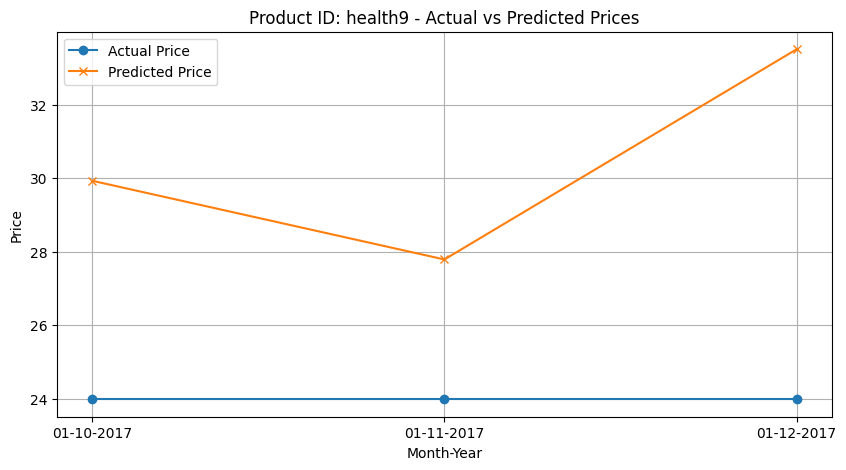

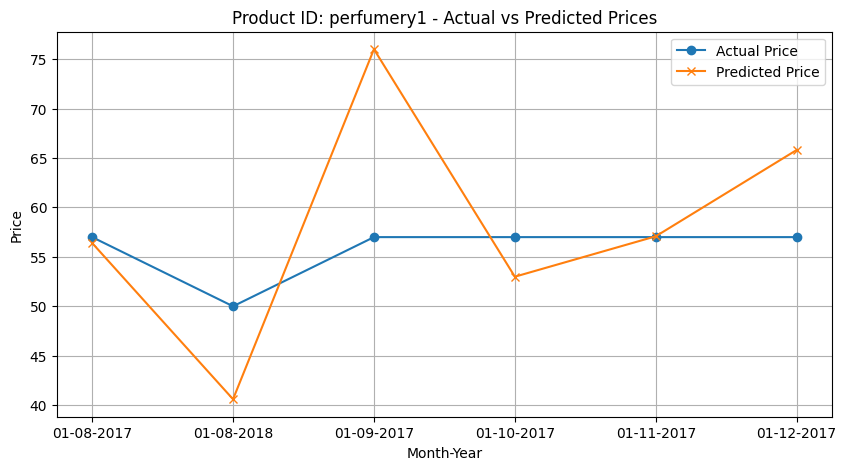

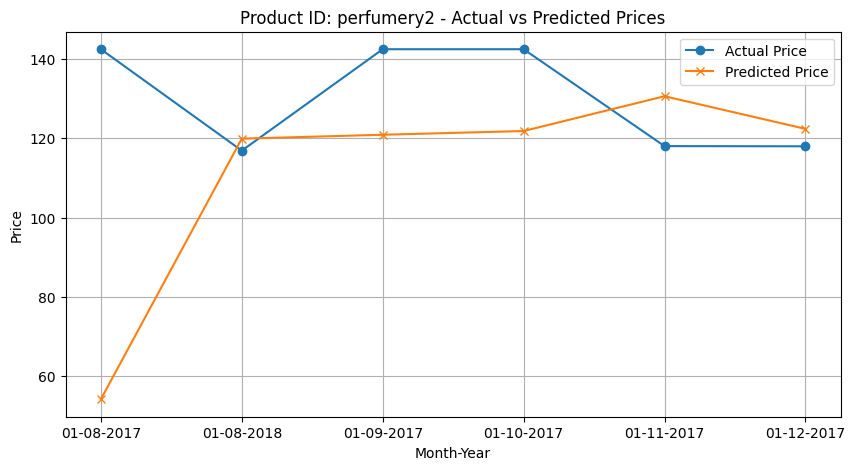

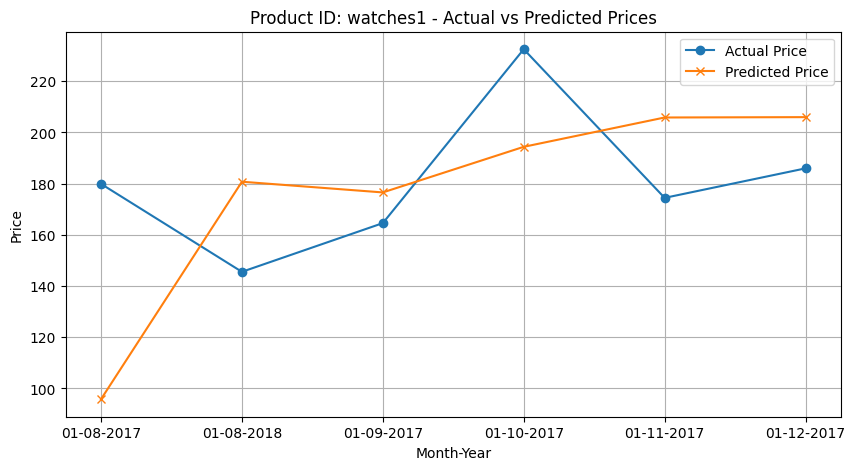

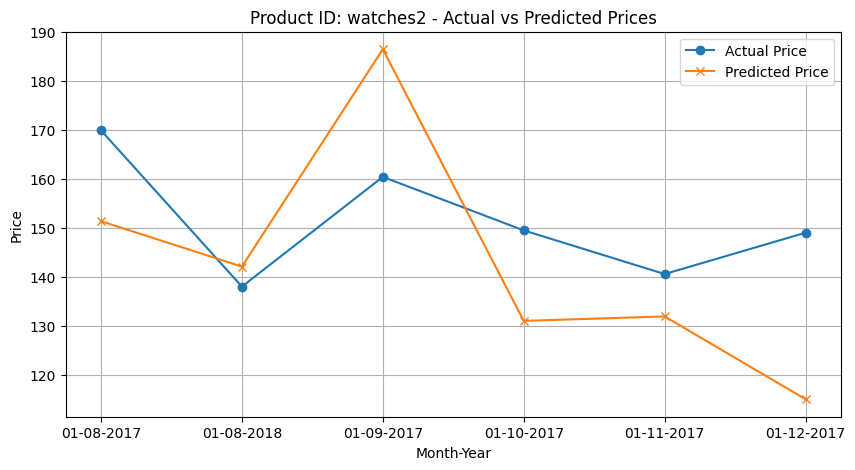

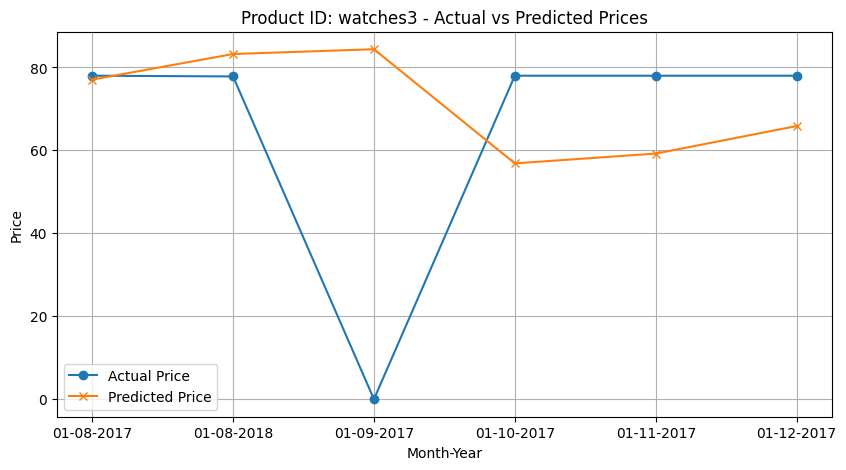

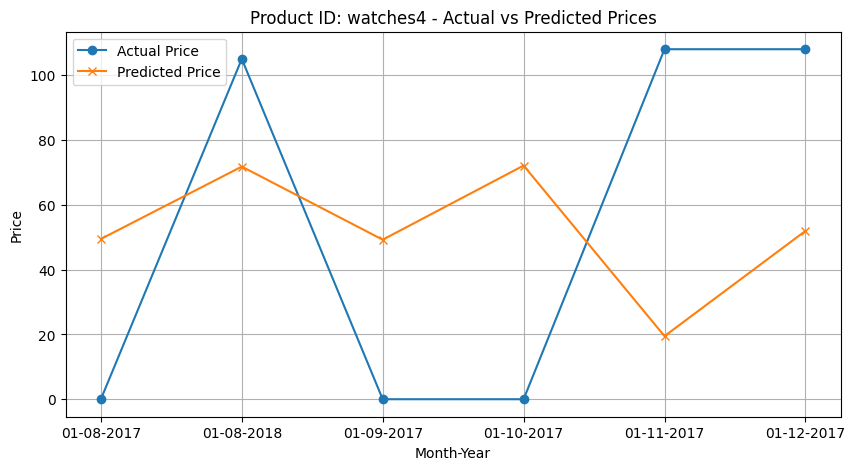

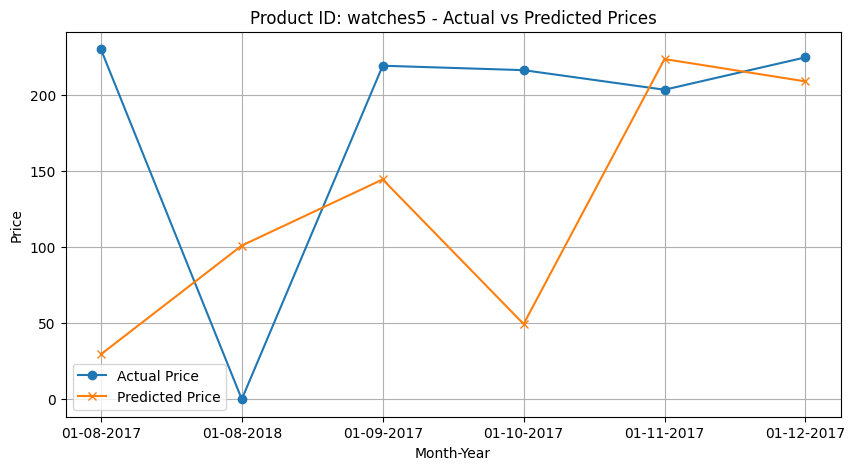

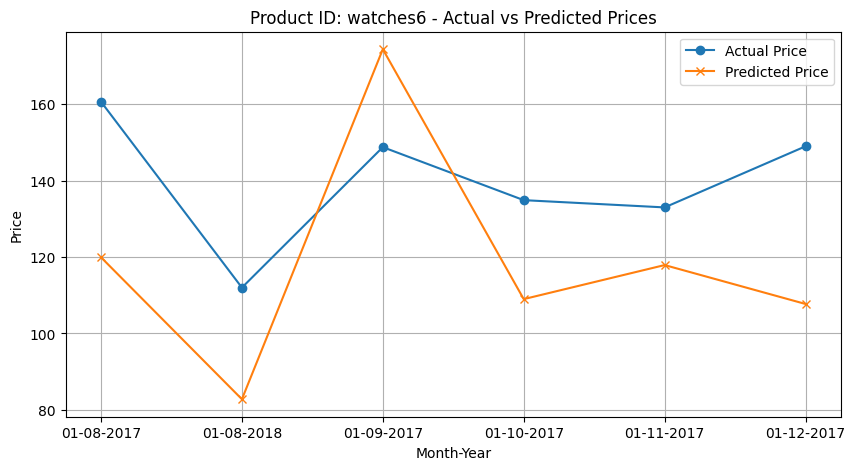

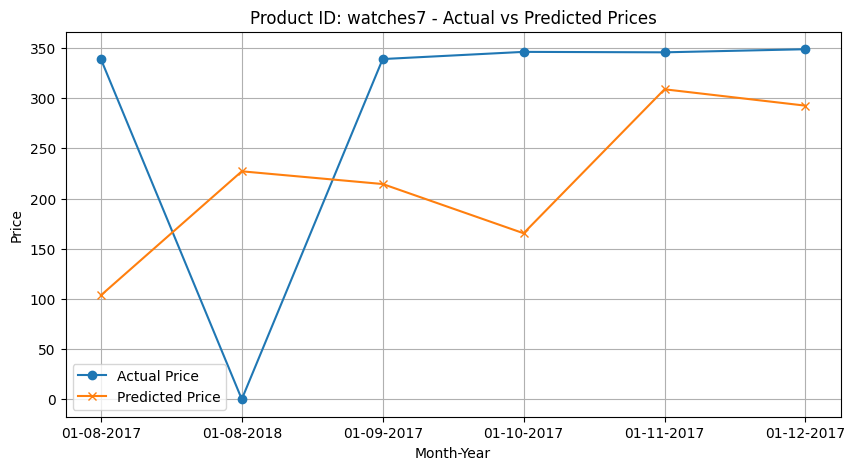

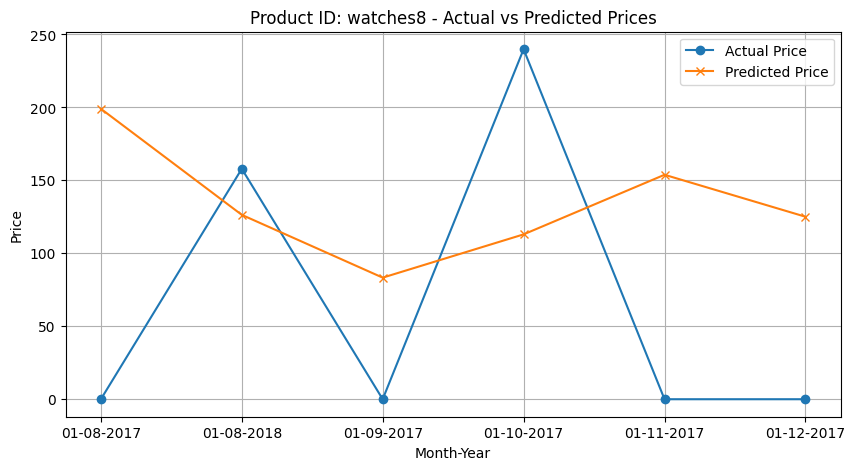

In [52]:
unique_products = test_df['product_id'].unique()
for product in unique_products:
    product_data = test_df[test_df['product_id'] == product]

    plt.figure(figsize=(10, 5))
    plt.plot(product_data['month_year'], product_data['unit_price'], label='Actual Price', marker='o')
    plt.plot(product_data['month_year'], product_data['predicted_price'], label='Predicted Price', marker='x')
    plt.title(f'Product ID: {product} - Actual vs Predicted Prices')
    plt.xlabel('Month-Year')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# **Random** **Forest**

In [53]:
train_df, test_df = train_test_split(grouped, test_size=0.2, shuffle=False, stratify=None)

In [54]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [55]:
model.fit(train_df[features], train_df[target])

RandomForestRegressor(random_state=42)

In [56]:
test_df['predicted_price'] = test_predictions

In [57]:
predictions_df = pd.DataFrame({'predicted_price': test_predictions}, index=test_df.index)
test_df = pd.concat([test_df, predictions_df], axis=1)

In [58]:
mae = mean_absolute_error(test_df[target], test_predictions)
mse = mean_squared_error(test_df[target], test_predictions)
rmse = mse ** 0.5

In [59]:
products_to_predict = grouped['product_id'].unique()
predictions_list = []

In [60]:
for product in products_to_predict:
    latest_data = grouped[grouped['product_id'] == product].sort_values(by='month_year').iloc[-1]
    features_for_prediction = latest_data[features].values.reshape(1, -1)
    predicted_price = model.predict(features_for_prediction)
    predictions_list.append({'product_id': product, 'predicted_price': predicted_price[0]})

predictions_df = pd.DataFrame(predictions_list)

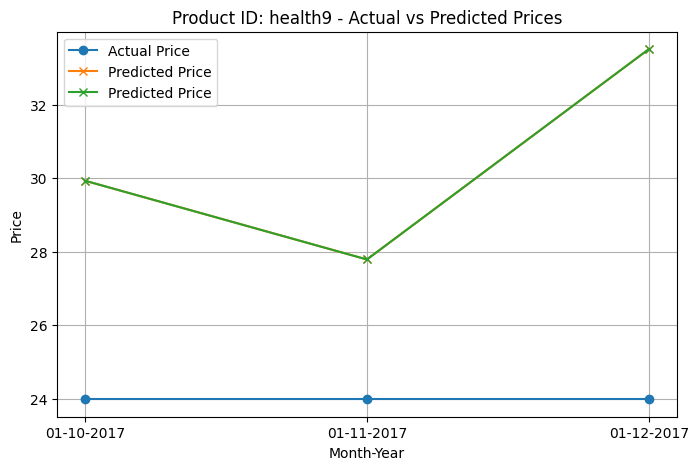

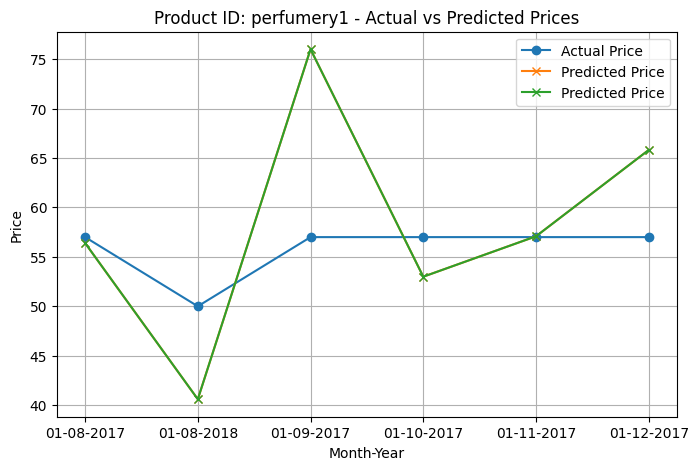

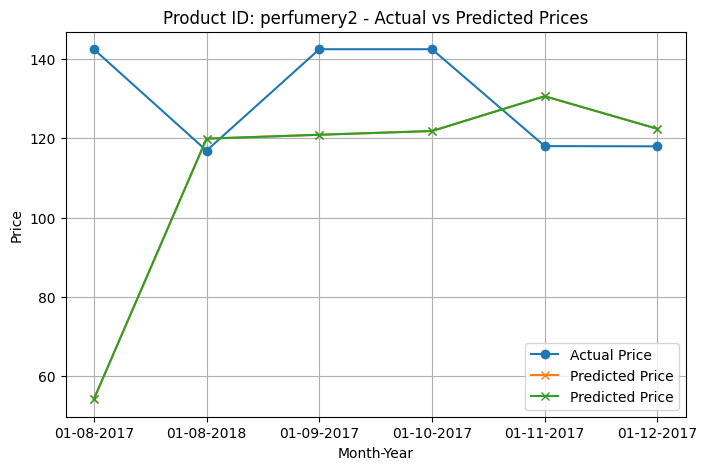

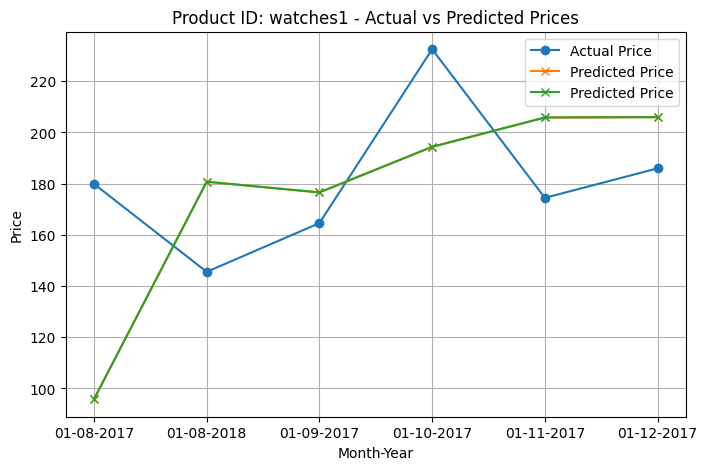

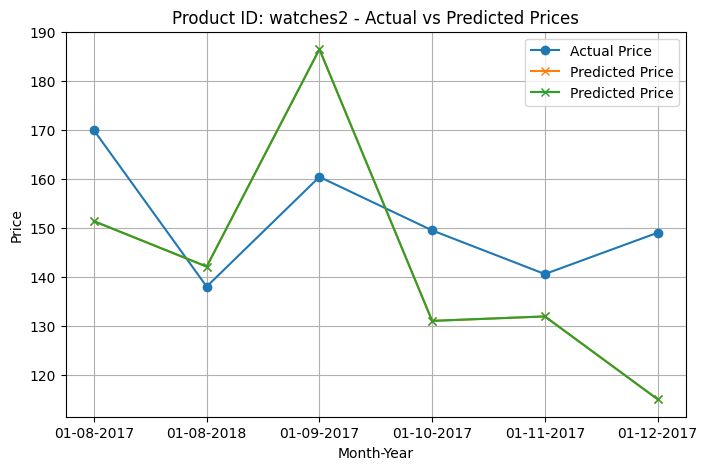

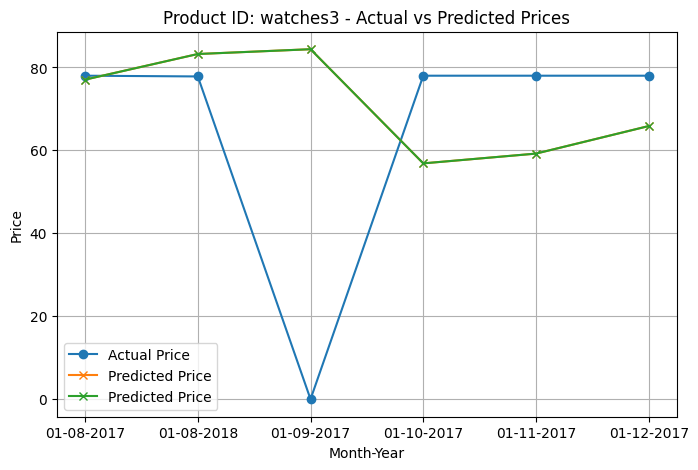

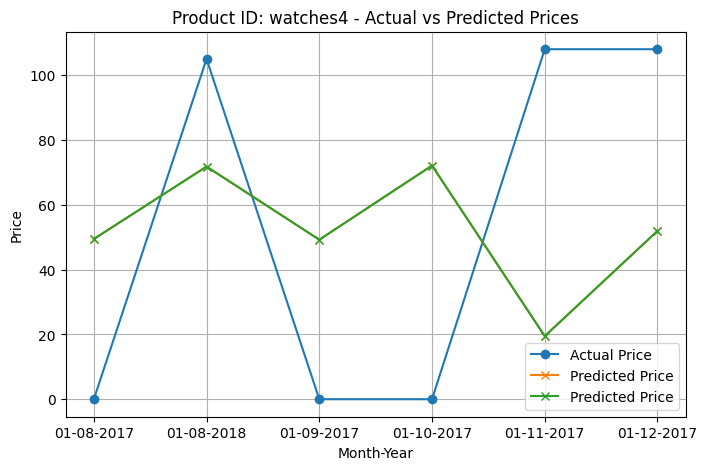

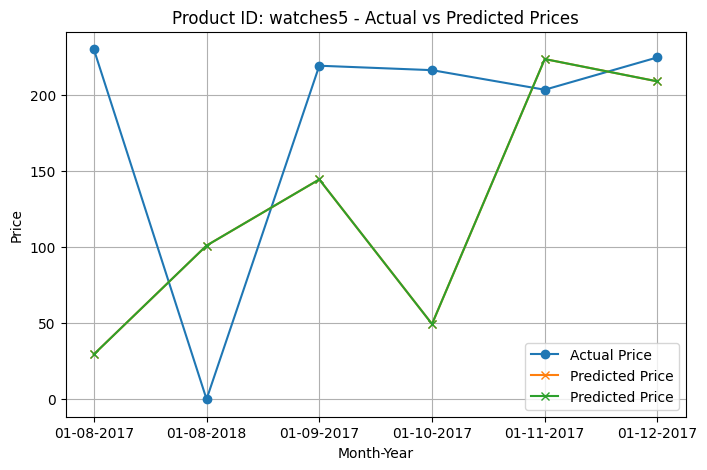

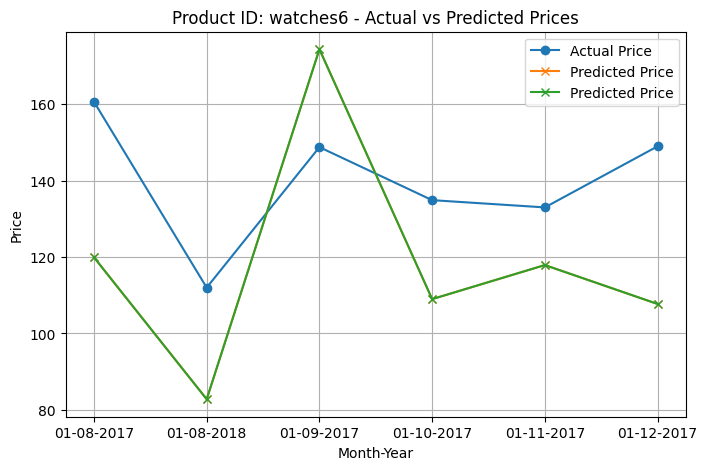

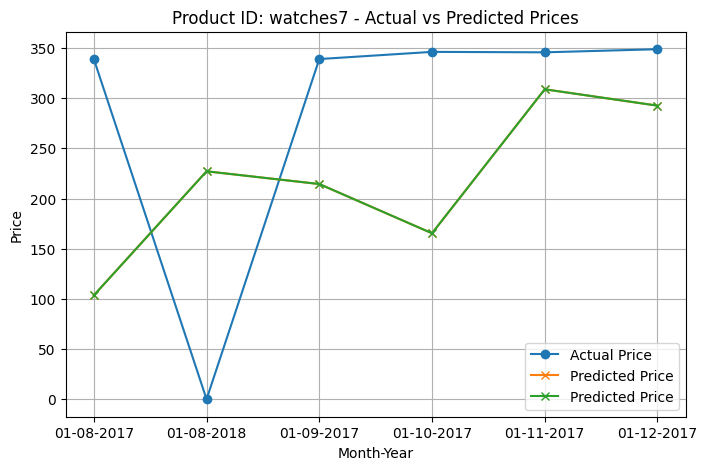

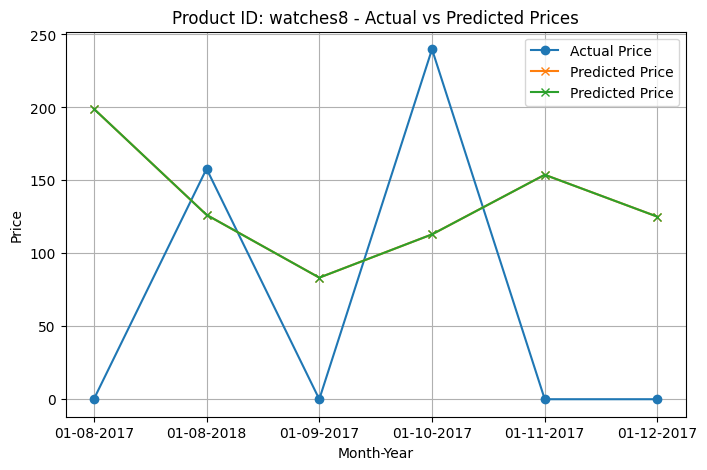

In [61]:
unique_products = test_df['product_id'].unique()
for product in unique_products:
    product_data = test_df[test_df['product_id'] == product]

    plt.figure(figsize=(8, 5))
    plt.plot(product_data['month_year'], product_data['unit_price'], label='Actual Price', marker='o')
    plt.plot(product_data['month_year'], product_data['predicted_price'], label='Predicted Price', marker='x')
    plt.title(f'Product ID: {product} - Actual vs Predicted Prices')
    plt.xlabel('Month-Year')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()